### Building a First Model

In [ ]:
# !pip install lightgbm
# !pip install ml_insights --upgrade
# !xcode-select --install
# !pip install structureboost --no-build-isolation

xcode-select: note: Command line tools are already installed. Use "Software Update" in System Settings or the softwareupdate command line interface to install updates
  Using cached structureboost-0.4.4.tar.gz (2.1 MB)
  Preparing metadata (pyproject.toml) ... done
  Created wheel for structureboost: filename=structureboost-0.4.4-cp312-cp312-macosx_11_0_arm64.whl size=1465673 sha256=b31004d5b9baab20d6c1ee4ca506cca90fa809e0021586403a99690c46c6efd8
  Stored in directory: /Users/charliebrunold/Library/Caches/pip/wheels/53/ce/28/66b92d1dec9719467a263752b577524bd1d8766fbadb317a05
Successfully built structureboost


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgbm
import structureboost as stb
import ml_insights as mli
from structureboost import log_loss
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [7]:
df = pd.read_csv('df_bp1.csv')

/var/folders/_c/3122h7k91n97hn2t5htc4nl80000gn/T/ipykernel_5180/2649927610.py:1: DtypeWarning: Columns (13,14,15,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_bp1.csv')


### Data Exploration

In [8]:
df.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186286 entries, 0 to 186285
Data columns (total 194 columns):
 #    Column                Non-Null Count   Dtype  
---   ------                --------------   -----  
 0    date                  186286 non-null  int64  
 1    dblheader_code        186286 non-null  int64  
 2    day_of_week           186286 non-null  object 
 3    team_v                186286 non-null  object 
 4    league_v              186286 non-null  object 
 5    game_no_v             186286 non-null  int64  
 6    team_h                186286 non-null  object 
 7    league_h              186286 non-null  object 
 8    game_no_h             186286 non-null  int64  
 9    runs_v                186286 non-null  int64  
 10   runs_h                186286 non-null  int64  
 11   outs_total            186286 non-null  int64  
 12   day_night             186286 non-null  object 
 13   completion_info       188 non-null     object 
 14   forfeit_info          19 non-null 

In [10]:
df.season.value_counts().sort_index()

season
1920    1234
1921    1229
1922    1238
1923    1233
1924    1231
1925    1228
1926    1234
1927    1236
1928    1231
1929    1229
1930    1234
1931    1236
1932    1233
1933    1226
1934    1223
1935    1228
1936    1238
1937    1239
1938    1223
1939    1231
1940    1236
1941    1244
1942    1224
1943    1238
1944    1242
1945    1230
1946    1242
1947    1243
1948    1237
1949    1240
1950    1238
1951    1239
1952    1239
1953    1240
1954    1237
1955    1234
1956    1239
1957    1235
1958    1235
1959    1238
1960    1236
1961    1430
1962    1621
1963    1619
1964    1626
1965    1623
1966    1615
1967    1620
1968    1625
1969    1946
1970    1944
1971    1938
1972    1859
1973    1943
1974    1945
1975    1934
1976    1939
1977    2103
1978    2102
1979    2099
1980    2105
1981    1394
1982    2107
1983    2109
1984    2105
1985    2103
1986    2103
1987    2105
1988    2100
1989    2106
1990    2105
1991    2104
1992    2106
1993    2269
1994    1600
1995    2017
1996 

In [ ]:
hv_mean = df.home_victory.mean()


Home victory mean: 54%


In [17]:
df.run_diff.value_counts().sort_index()
# only display when run_diff is 0
# df[df.run_diff == 0].run_diff.value_counts()

run_diff
-27        1
-24        1
-23        4
-22        5
-21        7
-20        7
-19       12
-18       29
-17       36
-16       72
-15       97
-14      198
-13      302
-12      453
-11      697
-10     1092
-9      1663
-8      2535
-7      3785
-6      5209
-5      7363
-4     10189
-3     13239
-2     16898
-1     21645
 0       399
 1     33870
 2     16993
 3     13701
 4     10674
 5      7784
 6      5547
 7      3798
 8      2786
 9      1884
 10     1286
 11      749
 12      513
 13      312
 14      179
 15      111
 16       65
 17       38
 18       23
 19       17
 20        7
 21        8
 22        1
 24        1
 25        1
Name: count, dtype: int64

In [ ]:
df.outs_total.value_counts()
# most common: 51 outs. this is what happens when the home team is leading into the 9th.

outs_total
51     83847
54     76777
60      3783
53      3724
52      3246
66      2048
58      1717
59      1585
72      1106
64       889
65       853
57       761
78       608
70       478
71       472
63       426
84       336
42       317
77       284
76       238
48       218
69       215
39       181
30       179
36       177
90       174
82       165
83       159
75       129
96        98
89        96
45        87
33        78
81        56
88        56
102       50
94        47
95        46
108       35
41        32
31        29
34        27
87        26
40        26
100       26
27        25
46        24
101       23
43        21
93        21
37        20
29        19
28        18
32        17
44        16
114       15
47        15
38        14
35        14
107       13
49        11
106       11
120       10
111        8
113        7
105        7
126        6
112        6
132        5
99         5
118        5
50         5
0          3
138        2
156        1
150        1
1

In [ ]:
df.home_victory[df.outs_total == 53].mean() # we SHOULD expect the home team to win 100% of the time when the game goes into the bottom of the ninth and then ends before 54 outs... right?
# df.home_victory[df.outs_total == 53].value_counts() # yet, 21 instances where this didn't happen. 

0.9997495438119431

In [ ]:
df.loc[(df.outs_total == 53) & (df.home_victory != 1), :]
# digging into details reveals interesting situations that challenge assumptions that you originally had about the game and how it works.

,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,runs_h,outs_total,day_night,completion_info,forfeit_info,protest_info,ballpark_id,attendance,game_minutes,linescore_v,linescore_h,AB_v,H_v,2B_v,3B_v,HR_v,RBI_v,SH_v,SF_v,HBP_v,BB_v,IBB_v,SO_v,SB_v,CS_v,GIDP_v,CI_v,LOB_v,P_num_v,ERind_v,ERteam_v,WP_v,balk_v,PO_v,ASST_v,ERR_v,PB_v,DP_v,TP_v,AB_h,H_h,2B_h,3B_h,HR_h,RBI_h,SH_h,SF_h,HBP_h,BB_h,IBB_h,SO_h,SB_h,CS_h,GIDP_h,CI_h,LOB_h,P_num_h,ERind_h,ERteam_h,WP_h,balk_h,PO_h,ASST_h,ERR_h,PB_h,DP_h,TP_h,ump_HB_id,ump_HB_name,ump_1B_id,ump_1B_name,ump_2B_id,ump_2B_name,ump_3B_id,ump_3B_name,ump_LF_id,ump_LF_name,ump_RF_id,ump_RF_name,mgr_id_v,mgr_name_v,mgr_id_h,mgr_name_h,pitcher_id_w,pitcher_name_w,pitcher_id_l,pitcher_name_l,pitcher_id_s,pitcher_name_s,GWRBI_id,GWRBI_name,pitcher_start_id_v,pitcher_start_name_v,pitcher_start_id_h,pitcher_start_name_h,batter1_name_v,batter1_id_v,batter1_pos_v,batter2_name_v,batter2_id_v,batter2_pos_v,batter3_name_v,batter3_id_v,batter3_pos_v,batter4_name_v,batter4_id_v,batter4_pos_v,batter5_name_v,batter5_id_v,batter5_pos_v,batter6_name_v,batter6_id_v,batter6_pos_v,batter7_name_v,batter7_id_v,batter7_pos_v,batter8_name_v,batter8_id_v,batter8_pos_v,batter9_name_v,batter9_id_v,batter9_pos_v,batter1_name_h,batter1_id_h,batter1_pos_h,batter2_name_h,batter2_id_h,batter2_pos_h,batter3_name_h,batter3_id_h,batter3_pos_h,batter4_name_h,batter4_id_h,batter4_pos_h,batter5_name_h,batter5_id_h,batter5_pos_h,batter6_name_h,batter6_id_h,batter6_pos_h,batter7_name_h,batter7_id_h,batter7_pos_h,batter8_name_h,batter8_id_h,batter8_pos_h,batter9_name_h,batter9_id_h,batter9_pos_h,misc_info,acqui_info,season,run_diff,home_victory,run_total,date_dblhead,AVG_162_h,AVG_162_v,OBP_162_h,OBP_162_v,SLG_162_h,SLG_162_v,OPS_162_h,OPS_162_v,SB_162_h,SB_162_v,CS_162_h,CS_162_v,ERR_162_h,ERR_162_v,AVG_30_h,AVG_30_v,OBP_30_h,OBP_30_v,SLG_30_h,SLG_30_v,OPS_30_h,OPS_30_v,SB_30_h,SB_30_v,CS_30_h,CS_30_v,ERR_30_h,ERR_30_v
61,19200425,0,Sun,NY1,NL,7,BRO,NL,9,5,2,53,D,NaN,NaN,NaN,NYC15,30000.0,106.0,020003000,000000110,32.0,7.0,4.0,0.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,6.0,2.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,0.0,0.0,26.0,9.0,2.0,0.0,1.0,0.0,30.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,5.0,3.0,2.0,2.0,0.0,0.0,27.0,6.0,3.0,0.0,0.0,0.0,mccob104,Barry McCormick,hartb901,Bob Hart,NaN,(none),NaN,(none),NaN,(none),NaN,(none),mcgrj101,John McGraw,robiw101,Wilbert Robinson,barnj102,Jesse Barnes,cadol101,Leon Cadore,NaN,(none),kellg101,High Pockets Kelly,barnj102,Jesse Barnes,cadol101,Leon Cadore,burng101,George Burns,7.0,younr101,Ross Youngs,9.0,fleta101,Art Fletcher,6.0,doyll101,Larry Doyle,4.0,kaufb101,Benny Kauff,8.0,sicke101,Ed Sicking,5.0,kellg101,High Pockets Kelly,3.0,snydf101,Frank Snyder,2.0,barnj102,Jesse Barnes,1.0,olsoi101,Ivy Olson,6.0,neisb101,Bernie Neis,9.0,johnj107,Jimmy Johnston,5.0,wheaz101,Zack Wheat,7.0,myerh102,Hi Myers,8.0,konee101,Ed Konetchy,3.0,kildp101,Pete Kilduff,4.0,kruee101,Ernie Krueger,2.0,cadol101,Leon Cadore,1.0,NaN,P,1920,-3,0,7,192004250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,19200820,2,Fri,CHA,AL,117,PHA,AL,115,5,2,53,D,NaN,V,NaN,PHI11,NaN,87.0,000203000,010000100,35.0,9.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,26.0,13.0,3.0,0.0,0.0,0.0,32.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,1.0,5.0,5.0,0.0,0.0,27.0,15.0,0.0,0.0,0.0,0.0,chilo901,Ollie Chill,owenb901,Brick Owens,NaN,(none),NaN,(none),NaN,(none),NaN,(none),gleak101,Kid Gleason,mackc101,Connie Mack,kerrd101,Dickey Kerr,perrs101,Scott Perry,NaN,(none),jackj101,Shoeless Joe Jackson,kerrd101,Dickey Kerr,perrs101,Scott Perry,strua102,Amos Strunk,9.0,colle101,Eddie Collins,4.0,weavb101,Buck Weaver,6.0,jackj101,Shoeless Joe Jackson,7.0,felsh101,Happy Felsch,8.0,colls101,Shano Collins,3.0,mcmuf101,Fred McMullin,5.0,schar103,Ray Schalk,2.0,kerrd101,Dickey Kerr,1.0,welcf101,Fran

In [ ]:
df.game_no_h.value_counts().sort_index() # good to interrogate the data to see if there are any oddities. ask questions.

game_no_h
1      1183
2      1182
3      1184
4      1182
5      1190
6      1191
7      1184
8      1188
9      1186
10     1172
11     1182
12     1161
13     1176
14     1181
15     1194
16     1192
17     1201
18     1212
19     1216
20     1189
21     1162
22     1188
23     1183
24     1195
25     1177
26     1174
27     1188
28     1171
29     1182
30     1192
31     1212
32     1205
33     1186
34     1199
35     1179
36     1157
37     1132
38     1138
39     1162
40     1178
41     1214
42     1216
43     1218
44     1214
45     1208
46     1217
47     1192
48     1181
49     1163
50     1185
51     1182
52     1191
53     1188
54     1185
55     1176
56     1163
57     1187
58     1191
59     1213
60     1224
61     1187
62     1167
63     1159
64     1136
65     1146
66     1172
67     1164
68     1165
69     1192
70     1174
71     1168
72     1173
73     1158
74     1159
75     1155
76     1196
77     1181
78     1163
79     1174
80     1148
81     1152
82     1157
83    

### Begin Modeling

In [27]:
df = df[df.run_diff != 0] # remove the games that ended in a tie.
df_train = df[df.season < 2018]
df_valid = df[(df.season >= 2019) & (df.season <= 2020)]
df_test = df[df.season > 2020]

In [28]:
features = ['OBP_162_h', 'OBP_162_v',
            'SLG_162_h', 'SLG_162_v',
            # 'OBP_30_h', 'OBP_30_v',
            # 'SLG_30_h', 'SLG_30_v',
            # 'game_no_h',
            ]

target = 'home_victory'

In [29]:
X_train = df_train.loc[:, features]
X_valid = df_valid.loc[:, features]
X_test = df_test.loc[:, features]

y_train = df_train[target].to_numpy()
y_valid = df_valid[target].to_numpy()
y_test = df_test[target].to_numpy()

In [30]:
X_train.shape, X_valid.shape, X_test.shape

((170411, 4), (3327, 4), (9718, 4))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 5.000e+00, 9.000e+00, 9.000e+00, 9.000e+00,
        2.400e+01, 2.500e+01, 2.300e+01, 2.500e+01, 4.200e+01, 5.500e+01,
        8.000e+01, 7.500e+01, 6.800e+01, 9.200e+01, 9.100e+01, 1.130e+02,
        1.200e+02, 1.800e+02, 2.410e+02, 3.000e+02, 3.030e+02, 3.480e+02,
        4.160e+02, 4.820e+02, 5.070e+02, 6.290e+02, 6.640e+02, 6.920e+02,
        7.350e+02, 7.810e+02, 9.840e+02, 1.106e+03, 1.172e+03, 1.355e+03,
        1.470e+03, 1.670e+03, 1.896e+03, 2.179e+03, 2.305e+03, 2.536e+03,
        2.634e+03, 2.960e+03, 2.996e+03, 3.284e+03, 3.315e+03, 3.484e+03,
        3.698e+03, 3.760e+03, 3.880e+03, 4.018e+03, 4.101e+03, 3.923e+03,
        4.193e+03, 4.222e+03, 4.407e+03, 4.509e+03, 4.512e+03, 4.384e+03,
        4.358e+03, 4.230e+03, 4.024e+0

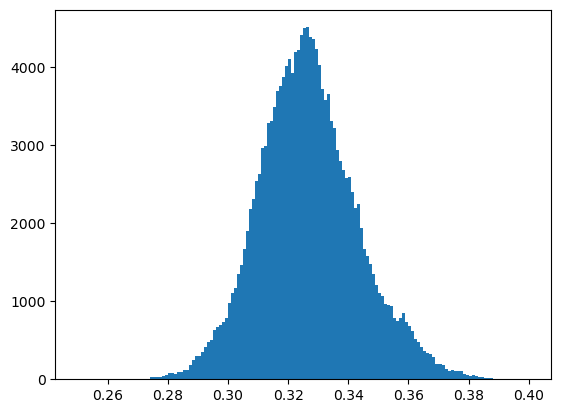

In [35]:
plt.hist(X_train.OBP_162_h, np.linspace(0.25, 0.4, 151)) # np.linspace(0.25, 0.4, 151) creates 150 bins between 0.25 and 0.4

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 6.000e+00, 1.200e+01,
        8.000e+00, 7.000e+00, 9.000e+00, 2.600e+01, 2.900e+01, 5.300e+01,
        3.900e+01, 5.500e+01, 4.800e+01, 3.900e+01, 4.600e+01, 3.200e+01,
        6.500e+01, 7.000e+01, 8.400e+01, 1.030e+02, 1.370e+02, 1.210e+02,
        1.470e+02, 1.620e+02, 1.790e+02, 2.060e+02, 2.120e+02, 1.930e+02,
        2.450e+02, 2.880e+02, 3.160e+02, 3.750e+02, 3.830e+02, 4.240e+02,
        3.970e+02, 3.870e+02, 4.270e+02, 4.620e+02, 5.170e+02, 5.150e+02,
        5.630e+02, 5.940e+02, 6.370e+02, 6.210e+02, 7.070e+02, 7.570e+02,
        8.020e+02, 7.920e+02, 9.190e+02, 9.750e+02, 1.015e+03, 1.069e+03,
        1.117e+03, 1.083e+03, 1.109e+0

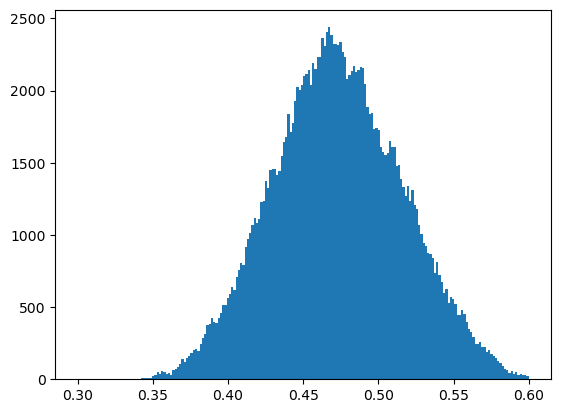

In [40]:
plt.hist(X_train.SLG_162_v, np.linspace(0.3, 0.6, 201)) # np.linspace(0.3, 0.5, 201) creates 200 bins between 0.3 and 0.5

In [42]:
# gradient boosting: https://www.youtube.com/watch?v=3CC4N4z3GJc&ab_channel=StatQuestwithJoshStarmer
lgbm1 = lgbm.LGBMClassifier(n_estimators=1000, learning_rate=0.02, max_depth=3)

lgbm1.fit(X_train, y_train, eval_set=(X_valid, y_valid), eval_metric='logloss', callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(10)])

[LightGBM] [Info] Number of positive: 92141, number of negative: 78270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 170411, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540699 -> initscore=0.163156
[LightGBM] [Info] Start training from score 0.163156
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier(learning_rate=0.02, max_depth=3, n_estimators=1000)

In [43]:
preds_lgbm = lgbm1.predict_proba(X_test)[:, 1]

In [44]:
log_loss(y_test, preds_lgbm), log_loss(y_test, hv_mean*np.ones(len(y_test))) # log_loss(y_test, preds_lgbm) is the log loss of the model predictions. log_loss(y_test, hv_mean*np.ones(len(y_test))) is the log loss of the mean home victory rate.

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None